# PyCon 2019: Data Science Best Practices with pandas ([video](https://www.youtube.com/watch?v=dPwLlJkSHLo&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y&index=36))

### GitHub repository: https://github.com/justmarkham/pycon-2019-tutorial

### Instructor: Kevin Markham

- Website: https://www.dataschool.io
- YouTube: https://www.youtube.com/dataschool
- Patreon: https://www.patreon.com/dataschool
- Twitter: https://twitter.com/justmarkham
- GitHub: https://github.com/justmarkham

## 1. Introduction to the TED Talks dataset

https://www.kaggle.com/rounakbanik/ted-talks

In [1]:
import pandas as pd
pd.__version__

'1.1.3'

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
ted = pd.read_csv('data/ted.csv')

In [5]:
# each row represents a single talk
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [6]:
# rows, columns
ted.shape

(2550, 17)

In [7]:
# object columns are usually strings, but can also be arbitrary Python objects (lists, dictionaries)
ted.dtypes

comments               int64
description           object
duration               int64
event                 object
film_date              int64
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date         int64
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
dtype: object

In [8]:
# count the number of missing values in each column
ted.isna().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

## 2. Which talks provoke the most online discussion?

In [10]:
# sort by the number of first-level comments, though this is biased in favor of older talks
ted.sort_values('comments', ascending = False).head() # descending order

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
644,3356,"Questions of good and evil, right and wrong ar...",1386,TED2010,1265846400,39,Sam Harris,Sam Harris: Science can answer moral questions,1,1269249180,"[{'id': 8, 'name': 'Informative', 'count': 923...","[{'id': 666, 'hero': 'https://pe.tedcdn.com/im...","Neuroscientist, philosopher","['culture', 'evolutionary psychology', 'global...",Science can answer moral questions,https://www.ted.com/talks/sam_harris_science_c...,3433437
201,2877,Jill Bolte Taylor got a research opportunity f...,1099,TED2008,1204070400,49,Jill Bolte Taylor,Jill Bolte Taylor: My stroke of insight,1,1205284200,"[{'id': 22, 'name': 'Fascinating', 'count': 14...","[{'id': 184, 'hero': 'https://pe.tedcdn.com/im...",Neuroanatomist,"['biology', 'brain', 'consciousness', 'global ...",My stroke of insight,https://www.ted.com/talks/jill_bolte_taylor_s_...,21190883
1787,2673,Our consciousness is a fundamental aspect of o...,1117,TED2014,1395100800,33,David Chalmers,David Chalmers: How do you explain consciousness?,1,1405350484,"[{'id': 25, 'name': 'OK', 'count': 280}, {'id'...","[{'id': 1308, 'hero': 'https://pe.tedcdn.com/i...",Philosopher,"['brain', 'consciousness', 'neuroscience', 'ph...",How do you explain consciousness?,https://www.ted.com/talks/david_chalmers_how_d...,2162764


In [12]:
# correct for this bias by calculating the number of comments per view
ted['comments_per_view'] = ted.comments / ted.views

In [13]:
# interpretation: for every view of the same-sex marriage talk, there are 0.002 comments
ted.sort_values('comments_per_view', ascending = False).head() # descending order

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_view
744,649,Hours before New York lawmakers rejected a key...,453,New York State Senate,1259712000,0,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,1,1282062180,"[{'id': 25, 'name': 'OK', 'count': 100}, {'id'...","[{'id': 217, 'hero': 'https://pe.tedcdn.com/im...",Senator,"['God', 'LGBT', 'culture', 'government', 'law'...",The case for same-sex marriage,https://www.ted.com/talks/diane_j_savino_the_c...,292395,0.002220
803,834,David Bismark demos a new system for voting th...,422,TEDGlobal 2010,1279065600,36,David Bismark,David Bismark: E-voting without fraud,1,1288685640,"[{'id': 25, 'name': 'OK', 'count': 111}, {'id'...","[{'id': 803, 'hero': 'https://pe.tedcdn.com/im...",Voting system designer,"['culture', 'democracy', 'design', 'global iss...",E-voting without fraud,https://www.ted.com/talks/david_bismark_e_voti...,543551,0.001534
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,0.001464
694,1502,Filmmaker Sharmeen Obaid-Chinoy takes on a ter...,489,TED2010,1265760000,32,Sharmeen Obaid-Chinoy,Sharmeen Obaid-Chinoy: Inside a school for sui...,1,1274865960,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 171, 'hero': 'https://pe.tedcdn.com/im...",Filmmaker,"['TED Fellows', 'children', 'culture', 'film',...",Inside a school for suicide bombers,https://www.ted.com/talks/sharmeen_obaid_chino...,1057238,0.001421
954,2492,Janet Echelman found her true voice as an arti...,566,TED2011,1299110400,35,Janet Echelman,Janet Echelman: Taking imagination seriously,1,1307489760,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 453, 'hero': 'https://pe.tedcdn.com/im...",Artist,"['art', 'cities', 'culture', 'data', 'design',...",Taking imagination seriously,https://www.ted.com/talks/janet_echelman,1832930,0.001360


In [11]:
# make this more interpretable by inverting the calculation
ted['views_per_comment'] = ted.views / ted.comments

In [12]:
# interpretation: 1 out of every 450 people leave a comment
ted.sort_values('views_per_comment').head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_view,views_per_comment
744,649,Hours before New York lawmakers rejected a key...,453,New York State Senate,1259712000,0,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,1,1282062180,"[{'id': 25, 'name': 'OK', 'count': 100}, {'id'...","[{'id': 217, 'hero': 'https://pe.tedcdn.com/im...",Senator,"['God', 'LGBT', 'culture', 'government', 'law'...",The case for same-sex marriage,https://www.ted.com/talks/diane_j_savino_the_c...,292395,0.002220,450.531587
803,834,David Bismark demos a new system for voting th...,422,TEDGlobal 2010,1279065600,36,David Bismark,David Bismark: E-voting without fraud,1,1288685640,"[{'id': 25, 'name': 'OK', 'count': 111}, {'id'...","[{'id': 803, 'hero': 'https://pe.tedcdn.com/im...",Voting system designer,"['culture', 'democracy', 'design', 'global iss...",E-voting without fraud,https://www.ted.com/talks/david_bismark_e_voti...,543551,0.001534,651.739808
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,0.001464,683.134291
694,1502,Filmmaker Sharmeen Obaid-Chinoy takes on a ter...,489,TED2010,1265760000,32,Sharmeen Obaid-Chinoy,Sharmeen Obaid-Chinoy: Inside a school for sui...,1,1274865960,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 171, 'hero': 'https://pe.tedcdn.com/im...",Filmmaker,"['TED Fellows', 'children', 'culture', 'film',...",Inside a school for suicide bombers,https://www.ted.com/talks/sharmeen_obaid_chino...,1057238,0.001421,703.886818
954,2492,Janet Echelman found her true voice as an arti...,566,TED2011,1299110400,35,Janet Echelman,Janet Echelman: Taking imagination seriously,1,1307489760,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 453, 'hero': 'https://pe.tedcdn.com/im...",Artist,"['art', 'cities', 'culture', 'data', 'design',...",Taking imagination seriously,https://www.ted.com/talks/janet_echelman,1832930,0.001360,735.525682


Lessons:

1. Consider the limitations and biases of your data when analyzing it
2. Make your results understandable

## 3. Visualize the distribution of comments

<AxesSubplot:>

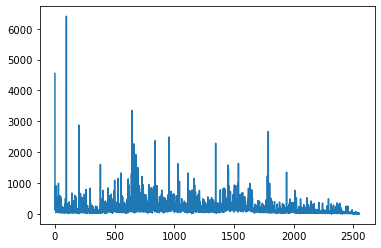

In [14]:
# line plot is not appropriate here (use it to measure something over time)
ted.comments.plot()

<AxesSubplot:ylabel='Frequency'>

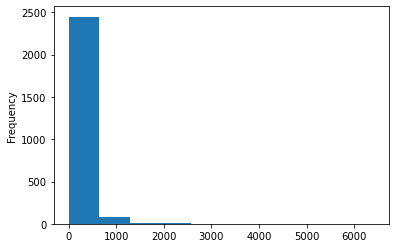

In [15]:
# histogram shows the frequency distribution of a single numeric variable
ted.comments.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

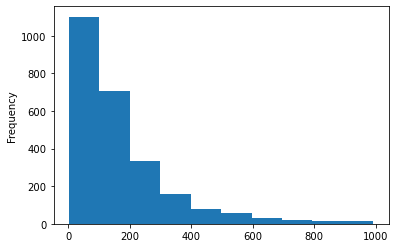

In [16]:
# modify the plot to be more informative
ted[ted.comments < 1000].comments.plot(kind='hist')

In [17]:
# check how many observations we removed from the plot
ted[ted.comments >= 1000].shape

(32, 18)

<AxesSubplot:ylabel='Frequency'>

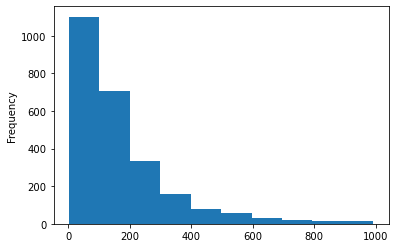

In [18]:
# can also write this using the query method
ted.query('comments < 1000').comments.plot(kind='hist')

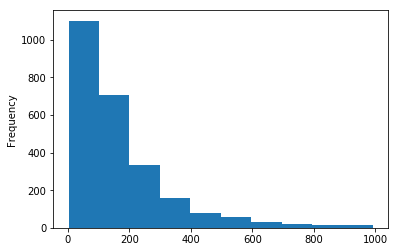

In [18]:
# can also write this using the loc accessor
ted.loc[ted.comments < 1000, 'comments'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

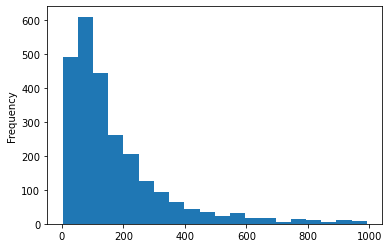

In [19]:
# increase the number of bins to see more detail
ted.loc[ted.comments < 1000, 'comments'].plot(kind='hist', bins=20)

<AxesSubplot:>

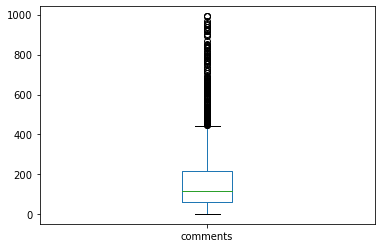

In [20]:
# boxplot can also show distributions, but it's far less useful for concentrated distributions because of outliers
ted.loc[ted.comments < 1000, 'comments'].plot(kind='box')

Lessons:

1. Choose your plot type based on the question you are answering and the data type(s) you are working with
2. Use pandas one-liners to iterate through plots quickly
3. Try modifying the plot defaults
4. Creating plots involves decision-making

## 4. Plot the number of talks that took place each year

Bonus exercise: calculate the average delay between filming and publishing

In [21]:
# event column does not always include the year
ted.event.sample(10)

2012       TEDxBoulder
1307           TEDxUCL
144     TEDGlobal 2007
1739           TED2014
1529    TEDGlobal 2013
1181    TEDxWomen 2011
2150     TEDYouth 2015
1719           TED2014
64             TED2007
1178     TEDxCambridge
Name: event, dtype: object

In [22]:
# dataset documentation for film_date says "Unix timestamp of the filming"
ted.film_date.head()

0    1140825600
1    1140825600
2    1140739200
3    1140912000
4    1140566400
Name: film_date, dtype: int64

In [23]:
# results don't look right
pd.to_datetime(ted.film_date).head()

0   1970-01-01 00:00:01.140825600
1   1970-01-01 00:00:01.140825600
2   1970-01-01 00:00:01.140739200
3   1970-01-01 00:00:01.140912000
4   1970-01-01 00:00:01.140566400
Name: film_date, dtype: datetime64[ns]

[pandas documentation for `to_datetime`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)

In [24]:
# now the results look right
pd.to_datetime(ted.film_date, unit='s').head()

0   2006-02-25
1   2006-02-25
2   2006-02-24
3   2006-02-26
4   2006-02-22
Name: film_date, dtype: datetime64[ns]

In [22]:
ted['film_datetime'] = pd.to_datetime(ted.film_date, unit='s')

In [25]:
ted[['event', 'film_datetime']]

,event,film_datetime
0,TED2006,2006-02-25
1,TED2006,2006-02-25
2,TED2006,2006-02-24
3,TED2006,2006-02-26
4,TED2006,2006-02-22
...,...,...
2545,TED2017,2017-06-06
2546,TED2017,2017-04-24
2547,TED2017,2017-04-24
2548,TEDxMileHigh,2017-07-08


In [23]:
# verify that event name matches film_datetime for a random sample
ted[['event', 'film_datetime']].sample(5)

,event,film_datetime
2119,TEDYouth 2015,2015-11-14
2413,TEDNYC,2017-02-15
1574,TEDGlobal 2013,2013-06-13
704,TED2010,2010-02-10
1740,TED2014,2014-03-20


In [27]:
# new column uses the datetime data type (this was an automatic conversion)
ted.dtypes

comments                       int64
description                   object
duration                       int64
event                         object
film_date                      int64
languages                      int64
main_speaker                  object
name                          object
num_speaker                    int64
published_date                 int64
ratings                       object
related_talks                 object
speaker_occupation            object
tags                          object
title                         object
url                           object
views                          int64
comments_per_view            float64
views_per_comment            float64
film_datetime         datetime64[ns]
dtype: object

In [28]:
# datetime columns have convenient attributes under the dt namespace
ted.film_datetime.dt.year.head()

0    2006
1    2006
2    2006
3    2006
4    2006
Name: film_datetime, dtype: int64

In [29]:
# similar to string methods under the str namespace
ted.event.str.lower().head()

0    ted2006
1    ted2006
2    ted2006
3    ted2006
4    ted2006
Name: event, dtype: object

In [30]:
# count the number of talks each year using value_counts()
ted.film_datetime.dt.year.value_counts()

2013    270
2011    270
2010    267
2012    267
2016    246
2015    239
2014    237
2009    232
2007    114
2017     98
2008     84
2005     66
2006     50
2003     33
2004     33
2002     27
1998      6
2001      5
1983      1
1991      1
1994      1
1990      1
1984      1
1972      1
Name: film_datetime, dtype: int64

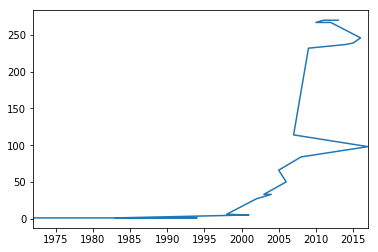

In [31]:
# points are plotted and connected in the order you give them to pandas
ted.film_datetime.dt.year.value_counts().plot()

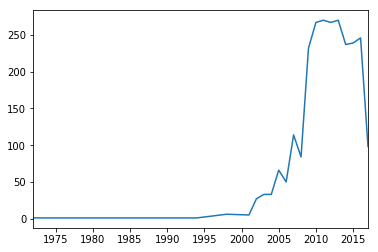

In [32]:
# need to sort the index before plotting
ted.film_datetime.dt.year.value_counts().sort_index().plot()

In [33]:
# we only have partial data for 2017
ted.film_datetime.max()

Timestamp('2017-08-27 00:00:00')

Lessons:

1. Read the documentation
2. Use the datetime data type for dates and times
3. Check your work as you go
4. Consider excluding data if it might not be relevant

## 5. What were the "best" events in TED history to attend?

In [26]:
# count the number of talks (great if you value variety, but they may not be great talks)
ted.event.value_counts().head()

TED2014    84
TED2009    83
TED2016    77
TED2013    77
TED2015    75
Name: event, dtype: int64

In [27]:
# use views as a proxy for "quality of talk"
ted.groupby('event').views.mean().head()

event
AORN Congress                  149818.0
Arbejdsglaede Live             971594.0
BBC TV                         521974.0
Bowery Poetry Club             676741.0
Business Innovation Factory    304086.0
Name: views, dtype: float64

In [34]:
# find the largest values, but we don't know how many talks are being averaged
ted.groupby('event').views.mean().sort_values( ascending=False ).head() # descending

event
TEDxPuget Sound      34309432.0
TEDxHouston          16140250.5
TEDxBloomington       9484259.5
TEDxCreativeCoast     8444981.0
TEDxNorrkoping        6569493.0
Name: views, dtype: float64

In [33]:
# show the number of talks along with the mean (events with the highest means had only 1 or 2 talks)
ted.groupby('event').views.agg(['count', 'mean']).sort_values('mean', ascending=False ).head() # descending

,count,mean
event,,
TEDxPuget Sound,1,34309432.0
TEDxHouston,2,16140250.5
TEDxBloomington,2,9484259.5
TEDxCreativeCoast,1,8444981.0
TEDxNorrkoping,1,6569493.0


In [32]:
# calculate the total views per event
ted.groupby('event').views.agg(['count', 'mean', 'sum']).sort_values('sum', ascending=False).head() # descending

,count,mean,sum
event,,,
TED2013,77,2.302700e+06,177307937
TED2014,84,2.072874e+06,174121423
TEDGlobal 2013,66,2.584163e+06,170554736
TED2015,75,2.011017e+06,150826305
TED2006,45,3.274345e+06,147345533


Lessons:

1. Think creatively for how you can use the data you have to answer your question
2. Watch out for small sample sizes

## 6. Unpack the ratings data

In [37]:
# previously, users could tag talks on the TED website (funny, inspiring, confusing, etc.)
ted.ratings.head()

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings, dtype: object

In [38]:
# two ways to examine the ratings data for the first talk
ted.loc[0, 'ratings']
ted.ratings[0]

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

In [39]:
# this is a string not a list
type(ted.ratings[0])

str

In [40]:
# convert this into something useful using Python's ast module (Abstract Syntax Tree)
import ast

In [41]:
# literal_eval() allows you to evaluate a string containing a Python literal or container
ast.literal_eval('[1, 2, 3]')

[1, 2, 3]

In [42]:
# if you have a string representation of something, you can retrieve what it actually represents
type(ast.literal_eval('[1, 2, 3]'))

list

In [43]:
# unpack the ratings data for the first talk
ast.literal_eval(ted.ratings[0])

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

In [44]:
# now we have a list (of dictionaries)
type(ast.literal_eval(ted.ratings[0]))

list

In [45]:
# define a function to convert an element in the ratings Series from string to list
def str_to_list(ratings_str):
    return ast.literal_eval(ratings_str)

In [46]:
# test the function
str_to_list(ted.ratings[0])

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

In [47]:
# Series apply method applies a function to every element in a Series and returns a Series
ted.ratings.apply(str_to_list).head()

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings, dtype: object

In [48]:
# lambda is a shorter alternative
ted.ratings.apply(lambda x: ast.literal_eval(x)).head()

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings, dtype: object

In [49]:
# an even shorter alternative is to apply the function directly (without lambda)
ted.ratings.apply(ast.literal_eval).head()

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings, dtype: object

In [50]:
ted['ratings_list'] = ted.ratings.apply(lambda x: ast.literal_eval(x))

In [51]:
# check that the new Series looks as expected
ted.ratings_list[0]

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

In [52]:
# each element in the Series is a list
type(ted.ratings_list[0])

list

In [53]:
# data type of the new Series is object
ted.ratings_list.dtype

dtype('O')

In [54]:
# object is not just for strings
ted.dtypes

comments                       int64
description                   object
duration                       int64
event                         object
film_date                      int64
languages                      int64
main_speaker                  object
name                          object
num_speaker                    int64
published_date                 int64
ratings                       object
related_talks                 object
speaker_occupation            object
tags                          object
title                         object
url                           object
views                          int64
comments_per_view            float64
film_datetime         datetime64[ns]
ratings_list                  object
dtype: object

Lessons:

1. Pay attention to data types in pandas
2. Use apply any time it is necessary

## 7. Count the total number of ratings received by each talk

Bonus exercises:

- for each talk, calculate the percentage of ratings that were negative
- for each talk, calculate the average number of ratings it received per day since it was published

In [55]:
# expected result (for each talk) is sum of count
ted.ratings_list[0]

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

In [56]:
# start by building a simple function
def get_num_ratings(list_of_dicts):
    return list_of_dicts[0]

In [57]:
# pass it a list, and it returns the first element in the list, which is a dictionary
get_num_ratings(ted.ratings_list[0])

{'id': 7, 'name': 'Funny', 'count': 19645}

In [58]:
# modify the function to return the vote count
def get_num_ratings(list_of_dicts):
    return list_of_dicts[0]['count']

In [59]:
# pass it a list, and it returns a value from the first dictionary in the list
get_num_ratings(ted.ratings_list[0])

19645

In [60]:
# modify the function to get the sum of count
def get_num_ratings(list_of_dicts):
    num = 0
    for d in list_of_dicts:
        num = num + d['count']
    return num

In [61]:
# looks about right
get_num_ratings(ted.ratings_list[0])

93850

In [62]:
# check with another record
ted.ratings_list[1]

[{'id': 7, 'name': 'Funny', 'count': 544},
 {'id': 3, 'name': 'Courageous', 'count': 139},
 {'id': 2, 'name': 'Confusing', 'count': 62},
 {'id': 1, 'name': 'Beautiful', 'count': 58},
 {'id': 21, 'name': 'Unconvincing', 'count': 258},
 {'id': 11, 'name': 'Longwinded', 'count': 113},
 {'id': 8, 'name': 'Informative', 'count': 443},
 {'id': 10, 'name': 'Inspiring', 'count': 413},
 {'id': 22, 'name': 'Fascinating', 'count': 132},
 {'id': 9, 'name': 'Ingenious', 'count': 56},
 {'id': 24, 'name': 'Persuasive', 'count': 268},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 116},
 {'id': 26, 'name': 'Obnoxious', 'count': 131},
 {'id': 25, 'name': 'OK', 'count': 203}]

In [63]:
# looks about right
get_num_ratings(ted.ratings_list[1])

2936

In [64]:
# apply it to every element in the Series
ted.ratings_list.apply(get_num_ratings).head()

0    93850
1     2936
2     2824
3     3728
4    25620
Name: ratings_list, dtype: int64

In [65]:
# another alternative is to use a generator expression
sum((d['count'] for d in ted.ratings_list[0]))

93850

In [66]:
# use lambda to apply this method
ted.ratings_list.apply(lambda x: sum((d['count'] for d in x))).head()

0    93850
1     2936
2     2824
3     3728
4    25620
Name: ratings_list, dtype: int64

In [67]:
# another alternative is to use pd.DataFrame()
pd.DataFrame(ted.ratings_list[0])['count'].sum()

93850

In [68]:
# use lambda to apply this method
ted.ratings_list.apply(lambda x: pd.DataFrame(x)['count'].sum()).head()

0    93850
1     2936
2     2824
3     3728
4    25620
Name: ratings_list, dtype: int64

In [69]:
ted['num_ratings'] = ted.ratings_list.apply(get_num_ratings)

In [70]:
# do one more check
ted.num_ratings.describe()

count     2550.000000
mean      2436.408235
std       4226.795631
min         68.000000
25%        870.750000
50%       1452.500000
75%       2506.750000
max      93850.000000
Name: num_ratings, dtype: float64

Lessons:

1. Write your code in small chunks, and check your work as you go
2. Lambda is best for simple functions

## 8. Which occupations deliver the funniest TED talks on average?

Bonus exercises:

- for each talk, calculate the most frequent rating
- for each talk, clean the occupation data so that there's only one occupation per talk

### Step 1: Count the number of funny ratings

In [71]:
# "Funny" is not always the first dictionary in the list
ted.ratings_list.head()

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings_list, dtype: object

In [72]:
# check ratings (not ratings_list) to see if "Funny" is always a rating type
ted.ratings.str.contains('Funny').value_counts()

True    2550
Name: ratings, dtype: int64

In [73]:
# write a custom function
def get_funny_ratings(list_of_dicts):
    for d in list_of_dicts:
        if d['name'] == 'Funny':
            return d['count']

In [74]:
# examine a record in which "Funny" is not the first dictionary
ted.ratings_list[3]

[{'id': 3, 'name': 'Courageous', 'count': 760},
 {'id': 1, 'name': 'Beautiful', 'count': 291},
 {'id': 2, 'name': 'Confusing', 'count': 32},
 {'id': 7, 'name': 'Funny', 'count': 59},
 {'id': 9, 'name': 'Ingenious', 'count': 105},
 {'id': 21, 'name': 'Unconvincing', 'count': 36},
 {'id': 11, 'name': 'Longwinded', 'count': 53},
 {'id': 8, 'name': 'Informative', 'count': 380},
 {'id': 10, 'name': 'Inspiring', 'count': 1070},
 {'id': 22, 'name': 'Fascinating', 'count': 132},
 {'id': 24, 'name': 'Persuasive', 'count': 460},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 230},
 {'id': 26, 'name': 'Obnoxious', 'count': 35},
 {'id': 25, 'name': 'OK', 'count': 85}]

In [75]:
# check that the function works
get_funny_ratings(ted.ratings_list[3])

59

In [76]:
# apply it to every element in the Series
ted['funny_ratings'] = ted.ratings_list.apply(get_funny_ratings)
ted.funny_ratings.head()

0    19645
1      544
2      964
3       59
4     1390
Name: funny_ratings, dtype: int64

In [77]:
# check for missing values
ted.funny_ratings.isna().sum()

0

### Step 2: Calculate the percentage of ratings that are funny

In [78]:
ted['funny_rate'] = ted.funny_ratings / ted.num_ratings

In [80]:
# "gut check" that this calculation makes sense by examining the occupations of the funniest talks

# Most funniest
ted.sort_values('funny_rate', ascending = False).speaker_occupation # descending

685     Actor, comedian, playwright
1398                       Comedian
747                        Comedian
173                        Investor
2114            Comedian and writer
                   ...             
2437         Environmental engineer
788               Building activist
808        Ethnic conflicts scholar
810           Labor-rights activist
2549                  Game designer
Name: speaker_occupation, Length: 2550, dtype: object

In [81]:
# examine the occupations of the least funny talks

#least funny talks
ted.sort_values('funny_rate').speaker_occupation.head(20) #ascending


2549               Game designer
1612                   Biologist
612                     Sculptor
998               Penguin expert
593                     Engineer
284               Space activist
1041         Biomedical engineer
1618      Spinal cord researcher
2132    Computational geneticist
442                     Sculptor
426              Author, thinker
458                     Educator
2437      Environmental engineer
1491             Photojournalist
1893     Forensic anthropologist
783             Marine biologist
195                    Kenyan MP
772             HIV/AIDS fighter
788            Building activist
936                Neuroengineer
Name: speaker_occupation, dtype: object

### Step 3: Analyze the funny rate by occupation

In [82]:
# calculate the mean funny rate for each occupation
ted.groupby('speaker_occupation').funny_rate.mean().sort_values( ascending = False)

speaker_occupation
Comedian and writer                    0.602085
Jugglers                               0.566828
Actor, comedian, playwright            0.558107
Actor, writer                          0.515152
Comedian                               0.512457
                                         ...   
Aid worker                             0.000000
Author, thinker                        0.000000
HIV/AIDS fighter                       0.000000
Political scientist and journalist     0.000000
 Chairman of the Cordoba Initiative    0.000000
Name: funny_rate, Length: 1458, dtype: float64

In [83]:
# however, most of the occupations have a sample size of 1
ted.speaker_occupation.describe()

count       2544
unique      1458
top       Writer
freq          45
Name: speaker_occupation, dtype: object

### Step 4: Focus on occupations that are well-represented in the data

In [85]:
# count how many times each occupation appears
ted.speaker_occupation.value_counts()

Writer                                         45
Designer                                       34
Artist                                         34
Journalist                                     33
Entrepreneur                                   31
                                               ..
Poetry critic                                   1
Emergency physician, public health advocate     1
Microbiologist, inventor and strategist         1
Visual storyteller                              1
Jazz pianist                                    1
Name: speaker_occupation, Length: 1458, dtype: int64

In [86]:
# value_counts() outputs a pandas Series, thus we can use pandas to manipulate the output
occupation_counts = ted.speaker_occupation.value_counts()
type(occupation_counts)

pandas.core.series.Series

In [87]:
# show occupations which appear at least 5 times
occupation_counts[occupation_counts >= 5]

Writer                   45
Designer                 34
Artist                   34
Journalist               33
Entrepreneur             31
                         ..
Sculptor                  5
Science writer            5
Surgeon                   5
Social Media Theorist     5
Producer                  5
Name: speaker_occupation, Length: 68, dtype: int64

In [88]:
# save the index of this Series
top_occupations = occupation_counts[occupation_counts >= 5].index
top_occupations

Index(['Writer', 'Designer', 'Artist', 'Journalist', 'Entrepreneur',
       'Architect', 'Inventor', 'Psychologist', 'Photographer', 'Filmmaker',
       'Neuroscientist', 'Educator', 'Economist', 'Author', 'Philosopher',
       'Roboticist', 'Biologist', 'Physicist', 'Musician', 'Marine biologist',
       'Technologist', 'Activist', 'Global health expert; data visionary',
       'Graphic designer', 'Oceanographer', 'Behavioral economist',
       'Historian', 'Astronomer', 'Singer/songwriter', 'Poet',
       'Philanthropist', 'Computer scientist', 'Futurist',
       'Social psychologist', 'Novelist', 'Engineer', 'Mathematician',
       'Astrophysicist', 'Singer-songwriter', 'Evolutionary biologist',
       'Comedian', 'Writer, activist', 'Climate advocate',
       'Performance poet, multimedia artist', 'Social entrepreneur',
       'Legal activist', 'Techno-illusionist', 'Photojournalist', 'Reporter',
       'Violinist', 'Sound consultant', 'Data scientist', 'Cartoonist',
       'Invest

### Step 5: Re-analyze the funny rate by occupation (for top occupations only)

In [89]:
# filter DataFrame to include only those occupations
ted_top_occupations = ted[ted.speaker_occupation.isin(top_occupations)]
ted_top_occupations.shape

(786, 23)

In [90]:
# redo the previous groupby

# Most Funny talks with occupation_counts >= 5
ted_top_occupations.groupby('speaker_occupation').funny_rate.mean().sort_values(ascending = False)

speaker_occupation
Comedian                                      0.512457
Performance poet, multimedia artist           0.306468
Singer/songwriter                             0.252205
Producer                                      0.202531
Data scientist                                0.184076
                                                ...   
Photographer                                  0.007152
Investor and advocate for moral leadership    0.005198
Photojournalist                               0.004908
Physician                                     0.004515
Surgeon                                       0.002465
Name: funny_rate, Length: 68, dtype: float64

Lessons:

1. Check your assumptions about your data
2. Check whether your results are reasonable
3. Take advantage of the fact that pandas operations often output a DataFrame or a Series
4. Watch out for small sample sizes
5. Consider the impact of missing data
6. Data scientists are hilarious